# _Titanic Deeplearning_

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('ttrain.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Embarked']=df['Embarked'].fillna(df['Fare'].mode()[0])

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [9]:
del df['Cabin']

In [10]:
del df['Ticket']

In [11]:
del df['Name']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [38]:
df['Age'] = df['Age'].fillna(30)

In [39]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [40]:
df=pd.get_dummies(df, drop_first=True)

In [41]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,30.0,1,0,7.2500,True,False,False,True
1,2,1,1,30.0,1,0,71.2833,False,True,False,False
2,3,1,3,30.0,0,0,7.9250,False,False,False,True
3,4,1,1,30.0,1,0,53.1000,False,False,False,True
4,5,0,3,30.0,0,0,8.0500,True,False,False,True


In [43]:
#pip install tensorflow

In [44]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [45]:
x=df.drop('Survived', axis=1) # survived u sil, diğerleri 1 e eşitle
y=df[['Survived']]

In [46]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,30.0,1,0,7.2500,True,False,False,True
1,2,1,1,30.0,1,0,71.2833,False,True,False,False
2,3,1,3,30.0,0,0,7.9250,False,False,False,True
3,4,1,1,30.0,1,0,53.1000,False,False,False,True
4,5,0,3,30.0,0,0,8.0500,True,False,False,True


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [48]:
model=Sequential()
model.add(Dense(32, activation='relu')) 
model.add(Dense(16, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
history=model.fit(x,y, batch_size=32, validation_split=0.10, verbose=2, epochs=100)

Epoch 1/100
26/26 - 1s - 50ms/step - accuracy: 0.5868 - loss: 12.7315 - val_accuracy: 0.4111 - val_loss: 3.1991
Epoch 2/100
26/26 - 0s - 4ms/step - accuracy: 0.6105 - loss: 2.9537 - val_accuracy: 0.6889 - val_loss: 1.6507
Epoch 3/100
26/26 - 0s - 4ms/step - accuracy: 0.6230 - loss: 2.1296 - val_accuracy: 0.6889 - val_loss: 1.2178
Epoch 4/100
26/26 - 0s - 8ms/step - accuracy: 0.6404 - loss: 1.5676 - val_accuracy: 0.6889 - val_loss: 0.7451
Epoch 5/100
26/26 - 0s - 4ms/step - accuracy: 0.6217 - loss: 1.1560 - val_accuracy: 0.7000 - val_loss: 0.6346
Epoch 6/100
26/26 - 0s - 4ms/step - accuracy: 0.6467 - loss: 0.9060 - val_accuracy: 0.7444 - val_loss: 0.5629
Epoch 7/100
26/26 - 0s - 4ms/step - accuracy: 0.6754 - loss: 0.7444 - val_accuracy: 0.6667 - val_loss: 0.8325
Epoch 8/100
26/26 - 0s - 4ms/step - accuracy: 0.6217 - loss: 0.8049 - val_accuracy: 0.6222 - val_loss: 1.5631
Epoch 9/100
26/26 - 0s - 4ms/step - accuracy: 0.5968 - loss: 1.0399 - val_accuracy: 0.6222 - val_loss: 2.2401
Epoch 10

In [52]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,693 (10.52 KB)

 Trainable params: 897 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,796 (7.02 KB)

In [53]:
loss,accuracy=model.evaluate(x,y)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7497 - loss: 0.5992 


In [54]:
accuracy

0.7497194409370422

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler=StandardScaler()

In [57]:
x=scaler.fit_transform(x)

In [58]:
history=model.fit(x,y, batch_size=32, validation_split=0.10, verbose=2, epochs=100)

Epoch 1/100
26/26 - 0s - 4ms/step - accuracy: 0.7990 - loss: 0.4928 - val_accuracy: 0.7778 - val_loss: 0.4979
Epoch 2/100
26/26 - 0s - 4ms/step - accuracy: 0.7965 - loss: 0.4641 - val_accuracy: 0.7778 - val_loss: 0.4759
Epoch 3/100
26/26 - 0s - 3ms/step - accuracy: 0.8015 - loss: 0.4521 - val_accuracy: 0.7889 - val_loss: 0.4659
Epoch 4/100
26/26 - 0s - 4ms/step - accuracy: 0.8015 - loss: 0.4444 - val_accuracy: 0.7889 - val_loss: 0.4527
Epoch 5/100
26/26 - 0s - 4ms/step - accuracy: 0.8027 - loss: 0.4465 - val_accuracy: 0.8111 - val_loss: 0.4379
Epoch 6/100
26/26 - 0s - 4ms/step - accuracy: 0.8077 - loss: 0.4368 - val_accuracy: 0.7889 - val_loss: 0.4401
Epoch 7/100
26/26 - 0s - 3ms/step - accuracy: 0.8065 - loss: 0.4324 - val_accuracy: 0.7889 - val_loss: 0.4372
Epoch 8/100
26/26 - 0s - 3ms/step - accuracy: 0.8090 - loss: 0.4296 - val_accuracy: 0.7889 - val_loss: 0.4374
Epoch 9/100
26/26 - 0s - 4ms/step - accuracy: 0.8102 - loss: 0.4271 - val_accuracy: 0.7889 - val_loss: 0.4346
Epoch 10/1

In [59]:
loss,accuracy=model.evaluate(x,y)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8272 - loss: 0.3871 


In [60]:
accuracy

0.8271604776382446

In [61]:
import matplotlib.pyplot as plt

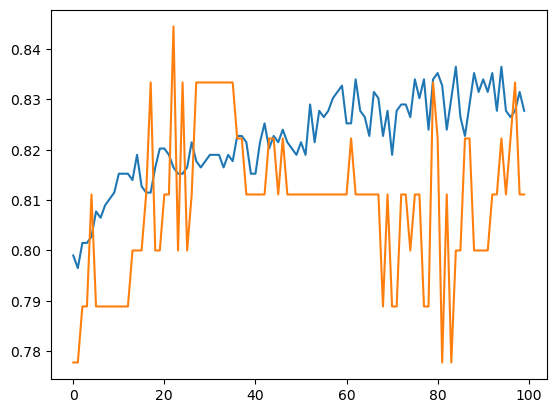

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']);